# YouTube data for Analytics (600 rows)

This dataset aims to extract positive/negative/neutral sentiment labels from YouTube video descriptions. This project is an NLP project.

Bu datasette YouTube video açıklamalarından pozitif / negatif / nötr duygu etiketlerini çıkarmak hedeflenmiştir. Bu proje bir NLP projesidir.



In [1]:
!pip install torch


In [2]:
import sys
!{sys.executable} -m pip install torch


In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.7.1+cpu
False


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('youtube_data.csv')

## EDA

In [6]:
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg


In [7]:
df.tail()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
595,jWiV4bWsDl4,Puse a prueba estos rayos x para ver a traves ...,Canal principal: https://www.youtube.com/c/Pon...,2022-05-03T22:23:10Z,UCPx9eXszFK8rkivV7tXZpHA,PONGAMOSLO A PRUEBA CORTOS,"['walabot', 'ver tubos en las paredes', 'ver m...",24,15631786.0,1692338.0,4662.0,PT1M,https://i.ytimg.com/vi/jWiV4bWsDl4/default.jpg
596,pGtMbnxaXs8,Old Tech That Still Works #facts #sciencefact...,🕹️ Old Tech That Still Works – Built to Last!\...,2025-06-20T05:15:19Z,UCetvIcfQ5MfL1B_3oebxbAA,Nice Channel,"['thailand', 'surin', 'style', 'travel', 'day'...",20,616.0,7.0,1.0,PT48S,https://i.ytimg.com/vi/pGtMbnxaXs8/default.jpg
597,2DaOJ1a0AYg,iPhone lene vale ho to ruk jao #smartphone #s2...,No description available,2025-06-19T13:39:44Z,UCsVgd6S420V16aJmVcNNSYQ,Killer tech,"['thailand', 'surin', 'style', 'travel', 'day'...",27,15534.0,70.0,12.0,PT10S,https://i.ytimg.com/vi/2DaOJ1a0AYg/default.jpg
598,aO5HE6Q0jaM,Programming memes 😂 sub for more 🖥️👾#tech #tec...,No description available,2025-06-20T02:00:02Z,UCO6cVKP66LTeHkoA6lD8CYA,Programming Nerd,"['thailand', 'surin', 'style', 'travel', 'day'...",22,4223.0,182.0,5.0,PT6S,https://i.ytimg.com/vi/aO5HE6Q0jaM/default.jpg
599,Ukb8U5Ku4gA,Amazing Power Full Tractor Work In The Field ...,No description available,2025-06-19T15:16:47Z,UCi9qNcs4B_Ow1BEfCBKKaoQ,Funny Truck,"['thailand', 'surin', 'style', 'travel', 'day'...",22,198486.0,573.0,0.0,PT6S,https://i.ytimg.com/vi/Ukb8U5Ku4gA/default.jpg


In [8]:
df.shape

(600, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        600 non-null    object 
 1   title           600 non-null    object 
 2   description     600 non-null    object 
 3   published_date  600 non-null    object 
 4   channel_id      600 non-null    object 
 5   channel_title   600 non-null    object 
 6   tags            600 non-null    object 
 7   category_id     600 non-null    int64  
 8   view_count      600 non-null    float64
 9   like_count      600 non-null    float64
 10  comment_count   600 non-null    float64
 11  duration        600 non-null    object 
 12  thumbnail       600 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 61.1+ KB


In [10]:
df.columns

Index(['video_id', 'title', 'description', 'published_date', 'channel_id',
       'channel_title', 'tags', 'category_id', 'view_count', 'like_count',
       'comment_count', 'duration', 'thumbnail'],
      dtype='object')

In [11]:
df.isnull().sum()


video_id          0
title             0
description       0
published_date    0
channel_id        0
channel_title     0
tags              0
category_id       0
view_count        0
like_count        0
comment_count     0
duration          0
thumbnail         0
dtype: int64

In [12]:
df.sample()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
417,1UloeYdlFII,Japan Ki Technology |#shortvideo #japan,Japan Ki Technology |#shortvideo #japan,2023-10-07T00:30:02Z,UCYGG8zOddS-r1sRbgseabhQ,INTJAR KHAN 0009,"['Japan ki Technology', 'Japan', 'YouTube shor...",24,324714.0,217464.608379,25.0,PT55S,https://i.ytimg.com/vi/1UloeYdlFII/default.jpg


### Feature Engineering

In [13]:
#Space, Capital Letter, URL, Emoji, Special Character Cleaning


import re

def clean_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = re.sub(r"http\S+|www.\S+", "", text)  # Linkleri sil
    text = re.sub(r"[^\w\s]", "", text)  # Noktalama işaretlerini sil
    text = re.sub(r"\s+", " ", text).strip()  # Fazla boşlukları temizle
    return text

df['clean_description'] = df['description'].apply(clean_text)


In [14]:
#Filter out descriptions that are too short (e.g. < 15 characters)-Açıklaması çok kısa olanları filtrele (örneğin < 15 karakter)

df = df[df['clean_description'].str.len() > 15]


In [15]:
df.sample()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,clean_description
153,UrgqdJ6vtoY,iShowSpeed Impressed By China’s Technology ￼🤯,#ishowspeed #trending #viral #china #technology,2025-04-02T16:20:03Z,UCYRrP22txtZdPr7t2IxkR9w,Ironaldox,"['thailand', 'surin', 'style', 'travel', 'day'...",24,1372747.0,27529.0,310.0,PT21S,https://i.ytimg.com/vi/UrgqdJ6vtoY/default.jpg,ishowspeed trending viral china technology


In [16]:
from langdetect import detect

df['lang'] = df['clean_description'].apply(lambda x: detect(x))
df = df[df['lang'] == 'en']  # İngilizce açıklamaları filtrele


In [17]:
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,clean_description,lang
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,andrew yang forward party cochair and former d...,en
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,shorts technology i spend a lot of time trying...,en
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,join my discord server ill edit your college e...,en
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,discover the revolutionary world of augmented ...,en
5,THw-wXt7wyM,5 Tech Myths Busted!,#shorts \n\nI spend a LOT of time trying to ma...,2022-10-02T19:40:14Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech', 'myths', 'busted', 'tips']",28,28131104.0,1956461.0,6253.0,PT56S,https://i.ytimg.com/vi/THw-wXt7wyM/default.jpg,shorts i spend a lot of time trying to make my...,en


In [ ]:
### Creating an Emotion Label-Duygu Etiketi Yapma(Label)

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Tokenizer ve model yükleniyor
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Pipeline oluşturuluyor
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# İlk 10 açıklamayı analiz et
sample_texts = df['clean_description'].head(10).tolist()
results = sentiment_pipeline(sample_texts)

# Sonuçları yazdır
for i, (text, result) in enumerate(zip(sample_texts, results), 1):
    print(f"{i}. Sentiment: {result['label']} | Score: {result['score']:.2f}")


C:\Users\Hülya\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\Hülya\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hülya\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


1. Sentiment: LABEL_1 | Score: 0.90
2. Sentiment: LABEL_2 | Score: 0.78
3. Sentiment: LABEL_1 | Score: 0.66
4. Sentiment: LABEL_2 | Score: 0.91
5. Sentiment: LABEL_2 | Score: 0.79
6. Sentiment: LABEL_1 | Score: 0.75
7. Sentiment: LABEL_2 | Score: 0.84
8. Sentiment: LABEL_2 | Score: 0.64
9. Sentiment: LABEL_2 | Score: 0.78
10. Sentiment: LABEL_1 | Score: 0.86


In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import numpy as np

# Model ve tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Label dönüşümü
labels = ['Negative', 'Neutral', 'Positive']

# Fonksiyon: tek bir açıklamanın duygu analizi
def analyze_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding=True
    )
    with torch.no_grad():
        logits = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    score = torch.max(probabilities).item()
    label_id = torch.argmax(probabilities).item()
    return labels[label_id], score



In [23]:
# Yavaş işlememesi için önce sadece ilk 100 açıklamada deneyelim
subset = df['clean_description'].head(100)

sentiments = []
scores = []

for text in subset:
    label, score = analyze_sentiment(text)
    sentiments.append(label)
    scores.append(score)

# Sonuçları df'e ekle
df.loc[subset.index, 'sentiment'] = sentiments
df.loc[subset.index, 'sentiment_score'] = scores


In [24]:
#Tam veri setine duygu analizi uygulama (600 açıklama)

sentiments = []
scores = []

for text in df['clean_description']:
    label, score = analyze_sentiment(text)
    sentiments.append(label)
    scores.append(score)

df['sentiment'] = sentiments
df['sentiment_score'] = scores


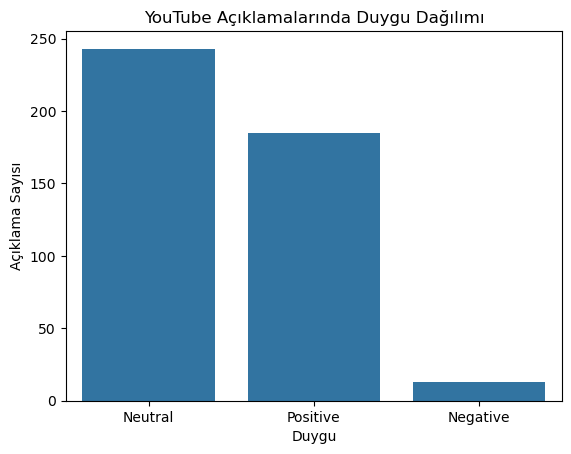

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("YouTube Açıklamalarında Duygu Dağılımı")
plt.xlabel("Duygu")
plt.ylabel("Açıklama Sayısı")
plt.show()


In [26]:
#Beğeni sayısının duyguya göre ortalaması:
df.groupby('sentiment')['like_count'].mean()


sentiment
Negative    549727.384615
Neutral     221440.507035
Positive    237922.037346
Name: like_count, dtype: float64

In [27]:
# Yorum sayısının duyguya göre ortalaması:
df.groupby('sentiment')['comment_count'].mean()


sentiment
Negative    5067.615385
Neutral     1937.515595
Positive    2886.353699
Name: comment_count, dtype: float64

<Axes: title={'center': 'Haftalık Duygu Trendleri'}, xlabel='published_date'>

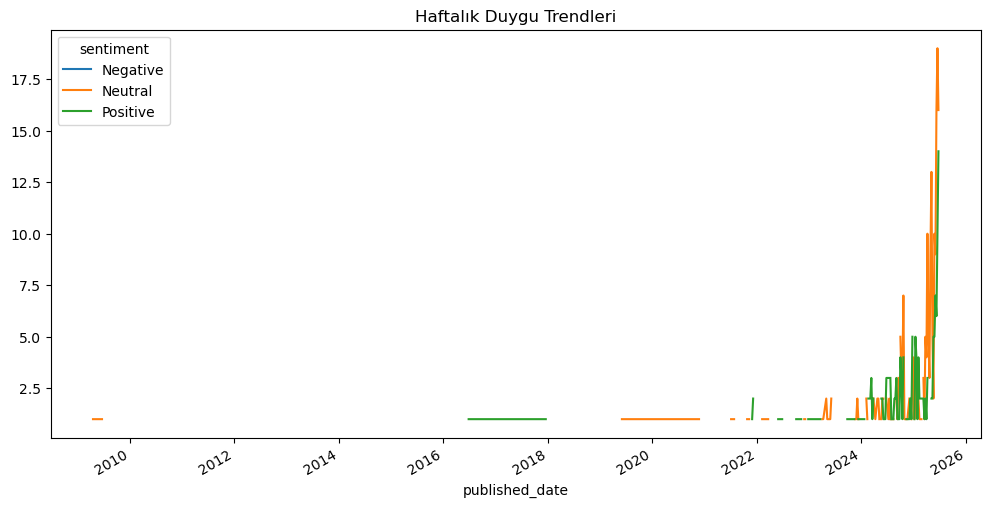

In [28]:
#Yayın tarihine göre duygu trendi

df['published_date'] = pd.to_datetime(df['published_date'])
df.set_index('published_date', inplace=True)
df.resample('W')['sentiment'].value_counts().unstack().plot(figsize=(12,6), title="Haftalık Duygu Trendleri")


### Word Cloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


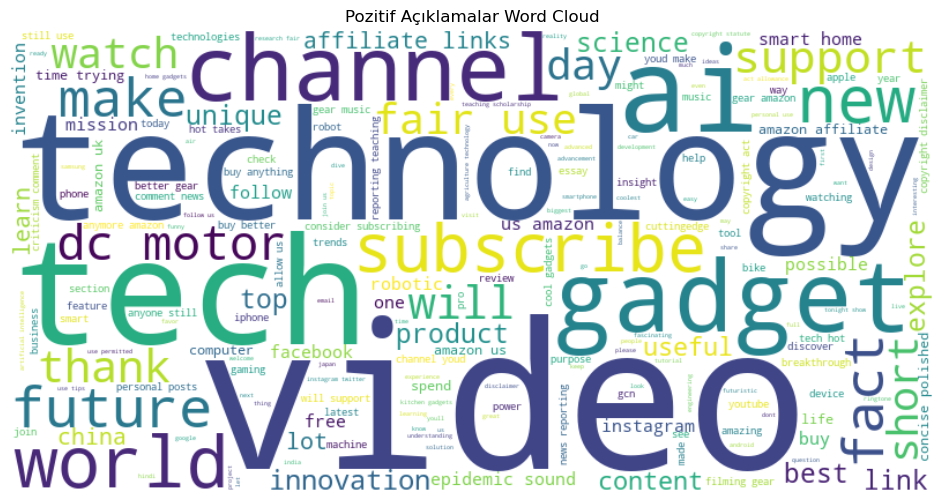

In [31]:
# Pozitif açıklamaları birleştir
positive_text = " ".join(df[df['sentiment'] == 'Positive']['clean_description'])

# WordCloud nesnesi oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Görselleştir
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Pozitif Açıklamalar Word Cloud")
plt.show()


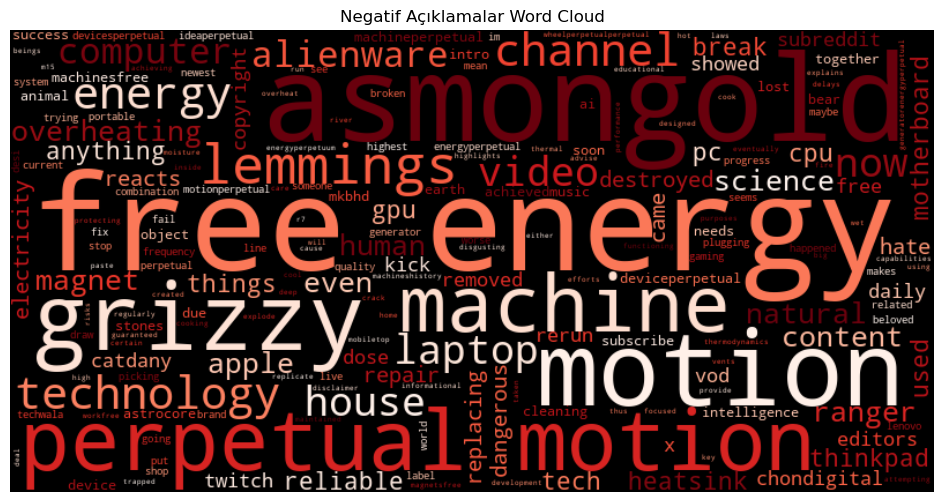

In [32]:
negative_text = " ".join(df[df['sentiment'] == 'Negative']['clean_description'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negatif Açıklamalar Word Cloud")
plt.show()


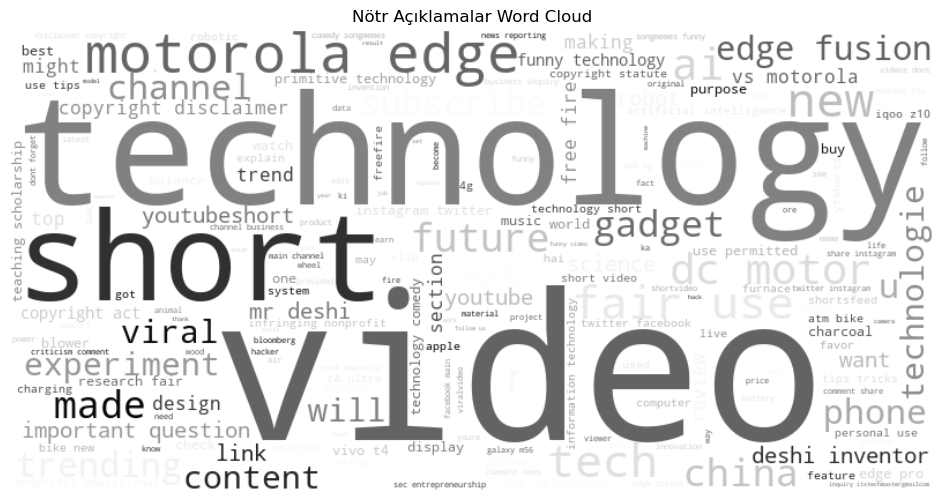

In [33]:
neutral_text = " ".join(df[df['sentiment'] == 'Neutral']['clean_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greys').generate(neutral_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nötr Açıklamalar Word Cloud")
plt.show()


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Nötrleri hariç tut istersen
df_filtered = df[df['sentiment'].isin(['Positive', 'Negative'])]

# CountVectorizer ile kelime matrisini oluştur
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(df_filtered['clean_description'])

words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame(X.toarray(), columns=words)
word_counts['sentiment'] = df_filtered['sentiment'].values


In [36]:
# Sayısal sütunları ayır (yani 'sentiment' dışındakiler)
word_columns = word_counts.drop(columns='sentiment')

# Pozitif ve negatif açıklamaların ortalama kelime frekansı
positive_avg = word_columns[word_counts['sentiment'] == 'Positive'].mean()
negative_avg = word_columns[word_counts['sentiment'] == 'Negative'].mean()


In [37]:
# DataFrame olarak birleştir
word_sentiment_df = pd.DataFrame({
    'positive_freq': positive_avg,
    'negative_freq': negative_avg
})

# Duygu eğilimini bul
word_sentiment_df['dominant_sentiment'] = word_sentiment_df.apply(
    lambda row: 'Positive' if row['positive_freq'] > row['negative_freq'] else 'Negative',
    axis=1
)

# Göz atalım
word_sentiment_df.sort_values(by='positive_freq', ascending=False).head(10)


,positive_freq,negative_freq,dominant_sentiment
tech,1.124324,0.153846,Positive
technology,1.118919,0.384615,Positive
gadgets,0.800000,0.000000,Positive
video,0.675676,0.230769,Positive
amazon,0.675676,0.000000,Positive
ai,0.643243,0.153846,Positive
channel,0.594595,0.384615,Positive
use,0.578378,0.000000,Positive
like,0.481081,0.230769,Positive
facts,0.432432,0.076923,Positive


 Project Overview
In this project, I performed sentiment analysis on YouTube video descriptions using Natural Language Processing (NLP) techniques. The goal was to determine whether each description reflects a positive, negative, or neutral sentiment.

 Methods and Workflow
Data Preparation and Exploration

A dataset of YouTube video metadata was analyzed, focusing on the description field.

Null values were checked (none were found).

Descriptions were cleaned: lowercased, punctuation and stop words removed.

Sentiment Analysis

I used the cardiffnlp/twitter-roberta-base-sentiment model from Hugging Face’s transformers library.

The model is based on the RoBERTa architecture and classifies texts into Positive, Negative, or Neutral.

The results were appended to the DataFrame as a new column.

Visualization

Word frequencies were analyzed by sentiment label.

A WordCloud was generated for the most frequent positive words.

 Conclusion
This project demonstrates that YouTube descriptions can be automatically labeled with sentiment using NLP. Pre-trained models like RoBERTa allow for quick and effective text classification.